In [1]:
###: Loading H2O Library

In [2]:
import h2o

In [3]:
###: Get H2O Version

In [4]:
h2o.__version__

u'3.14.0.7'

In [5]:
###: Initalizing H2O cluster

In [6]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 days 4 hours 5 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month and 2 days
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,2.669 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
###: Importing both training and test dataset into H2O cluster memory

In [8]:
#train_df = h2o.import_file("/Users/avkashchauhan/examples/regression/house_price_train.csv")
#test_df = h2o.import_file("/Users/avkashchauhan/examples/regression/house_price_test.csv")

train_df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/house_price_train.csv")
test_df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/house_price_test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
###: Understanding Training dataset

In [10]:
train_df.describe()

Rows:407
Cols:14




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
type,real,real,real,int,real,real,real,real,int,int,real,real,real,real
mins,0.00906,0.0,0.46,0.0,0.385,3.863,2.9,1.1296,1.0,188.0,12.6,0.32,1.73,5.0
mean,3.56736771499,10.5872235872,11.4092628993,0.0687960687961,0.556763882064,6.28658230958,69.3889434889,3.71767051597,9.83783783784,412.378378378,18.4474201474,354.403218673,12.792039312,22.6248157248
maxs,73.5341,100.0,27.74,1.0,0.871,8.725,100.0,10.7103,24.0,711.0,22.0,396.9,37.97,50.0
sigma,7.94798961655,22.2597824603,6.8144822924,0.253418548596,0.115557348898,0.690897322921,27.8179045475,2.01524090631,8.78440418525,170.44740987,2.16176742548,94.175205015,7.09869539936,9.18501930903
zeros,0,301,0,379,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [11]:
###: Understanding Test dataset

In [12]:
test_df.describe()

Rows:99
Cols:14




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
type,real,real,real,int,real,real,real,real,int,int,real,real,real,real
mins,0.00632,0.0,0.74,0.0,0.389,3.561,9.9,1.1781,1.0,187.0,12.6,6.68,2.88,5.6
mean,3.80327535354,14.5555555556,10.0165656566,0.0707070707071,0.54618989899,6.27662626263,65.2282828283,4.11312828283,8.36363636364,391.212121212,18.4888888889,366.00959596,12.0817171717,22.1545454545
maxs,88.9762,95.0,27.74,1.0,0.871,8.78,100.0,12.1265,24.0,711.0,22.0,396.9,34.41,50.0
sigma,10.9318629744,27.154498339,6.96902859181,0.257639411539,0.11739221152,0.752520981955,29.378799938,2.42831711324,8.3206830389,160.149373687,2.18869492793,78.0843033028,7.32150592857,9.28388193709
zeros,0,71,0,92,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
2,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.9,18.72,15.2


In [13]:
###: Training and test dataset - columns and rows details

In [14]:
print(train_df.shape)
print(test_df.shape)

(407, 14)
(99, 14)


In [15]:
###: Training and Test Dataframes - columns names

In [16]:
print(train_df.col_names)
print(test_df.col_names)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']
[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']


In [18]:
###: Settings response or target variable for supervised machine learning

In [19]:
response = "medv"
features = train_df.col_names
print(features)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']


In [20]:
###: Creating a list of all features we will use for machine learning

In [21]:
features.remove(response)
print(features)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat']


In [22]:
###: Understanding response variable values as historgram in Training data

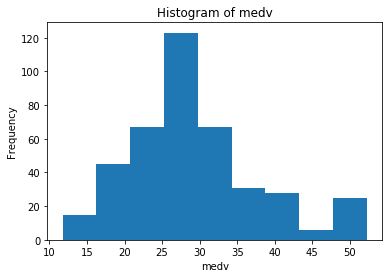

In [23]:
train_df['medv'].hist()

In [24]:
###: Importing H2O H2OGeneralizedLinearEstimator to build GLM Model

In [26]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [27]:
###: Building Deep Learning -  Regression model with cross validation

In [39]:
drf_model_with_cv = H2ODeepLearningEstimator(nfolds=5)
drf_model_with_cv.train(x = features, y = response, training_frame=train_df)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [40]:
dl_model_with_cv.model_performance(valid=True,test_data=test_df).r2()

0.7962841378604238

In [41]:
###: Building Deep Learning  Regression model with training and validation data now
###:  Setting key Deep Learning parameters

In [44]:
dl_model_with_cv = H2ODeepLearningEstimator(distribution="AUTO",
                                 nfolds=5,
                                 fold_assignment="Modulo",
                                 keep_cross_validation_predictions=True,
                                 hidden = [10,10],
                                 epochs = 25,
                                 score_training_samples=20,
                                 activation="Rectifier",
                                 adaptive_rate = False,
                                 train_samples_per_iteration=10,
                                 seed=1)

In [45]:
###: Training the Deep Learning model

In [46]:
dl_model_with_cv.train(x = features, y = response, 
                                            training_frame=train_df, 
                                           model_id = "dl_model_with_training_and_validtion_python")

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [47]:
###: Getting model performance based on test data

In [49]:
dl_model_with_cv.model_performance(valid=True,test_data=test_df).r2()

0.7732914896158447

In [50]:
###: Importing H2O Grid Search Library

In [51]:
from h2o.grid import H2OGridSearch

In [53]:
###: Setting Deep Learning specific Parameters

In [57]:
dl_hyper_params = {"hidden": [10,20,30],
                "epochs": [ 10, 15, 20],
                "score_training_samples": [10, 20, 30],
                "train_samples_per_iteration": [5,10,20]}

In [58]:
###: Setting hyperparameter search criteria

In [59]:
grid_search_criteria = {"strategy": "RandomDiscrete", 
                        "max_models": 100, 
                        "seed": 12345}

In [60]:
###: Finalizing the settings for Deep Learning grid search

In [63]:
house_price_dl_grid = H2OGridSearch(model=H2ODeepLearningEstimator(
                                                        seed=1,
                                                        nfolds=5,
                                                        fold_assignment="Modulo",
                                                        keep_cross_validation_predictions=True),
                     hyper_params=gbm_hyper_params,
                     search_criteria=grid_search_criteria,
                     grid_id="house_price_dl_grid")

In [64]:
###: Finally traning the Deep Learning grid Search Model

In [66]:
house_price_dl_grid.train(x=features, y=response, training_frame=train_df)

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [68]:
###: Getting the tital number of models built into H2O Grid

In [69]:
len(house_price_dl_grid)

81

In [70]:
###: Definiting a function to find the best model from the grid based on r2 or auc

In [71]:
def find_best_model_from_grid(h2o_grid, test_parameter):    
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)            
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)            
    #print(model_list)        
    max_index = model_list.index(max(model_list))
    #print(max_index)
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " +  best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " +  str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " +  str(best_model.auc()))
    return best_model

In [72]:
###: Applying the function to get the best model from the grid

In [74]:
best_dl_model = find_best_model_from_grid(house_price_dl_grid, "r2")

Model ID with best R2: house_price_dl_grid_model_31
Best R2: 0.926227265434


In [75]:
###: Performing predictions with one of the above model

In [76]:
dl_predictions = best_dl_model.predict(test_data=test_df)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [77]:
###: Understanding/Validating predictions based on prediction results historgram

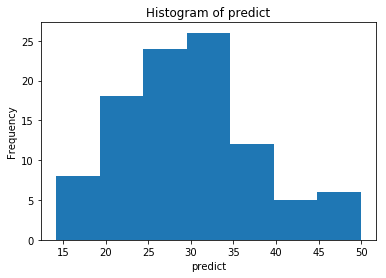

In [78]:
dl_predictions.hist()

In [79]:
#: Getting Scorring History

In [80]:
best_dl_model.score_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae
0,,2017-11-22 23:33:19,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN
1,,2017-11-22 23:33:19,21.398 sec,10000 obs/sec,0.024570,1,10.0,12.654720,160.141942,10.130458
2,,2017-11-22 23:33:19,21.492 sec,86946 obs/sec,20.081081,416,8173.0,2.669606,7.126796,2.109371


In [82]:
#: Getting DL model variable importance 

In [83]:
best_dl_model.varimp()

[(u'tax', 1.0, 1.0, 0.09348047417397648),
 (u'indus', 0.944062352180481, 0.944062352180481, 0.08825139633163093),
 (u'rad', 0.8933843970298767, 0.8933843970298767, 0.08351399705398493),
 (u'chas', 0.889883816242218, 0.889883816242218, 0.08318676110207028),
 (u'rm', 0.8883118629455566, 0.8883118629455566, 0.08303981416251903),
 (u'lstat', 0.8757022023200989, 0.8757022023200989, 0.08186105710807833),
 (u'dis', 0.860404908657074, 0.860404908657074, 0.0804310588428802),
 (u'zn', 0.8183542490005493, 0.8183542490005493, 0.07650014323885976),
 (u'ptratio', 0.7991148829460144, 0.7991148829460144, 0.07470163817727513),
 (u'b', 0.7515822052955627, 0.7515822052955627, 0.07025826093175214),
 (u'age', 0.6750404834747314, 0.6750404834747314, 0.06310310448184822),
 (u'crim', 0.6557103991508484, 0.6557103991508484, 0.061296119033428687),
 (u'nox', 0.6458693742752075, 0.6458693742752075, 0.06037617536169588)]

In [84]:
#: Getting DL model variable importance PLOT

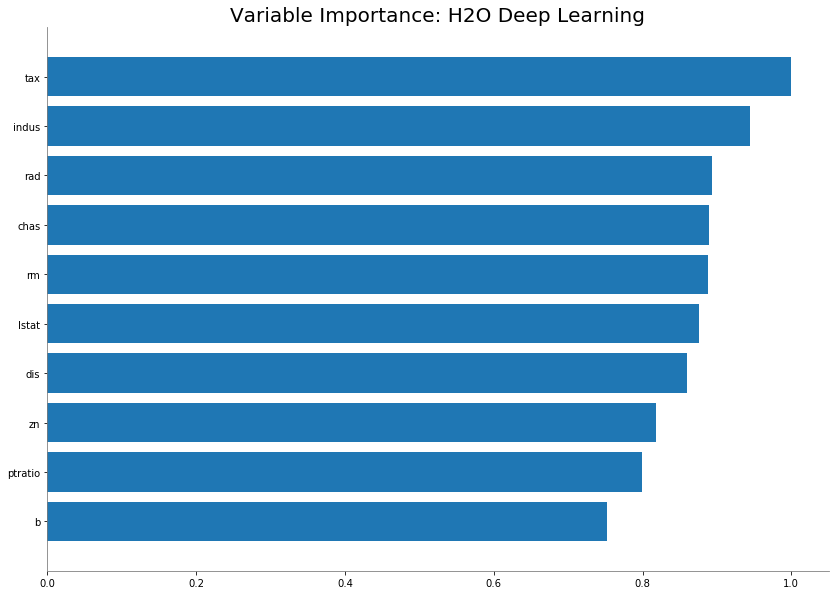

In [85]:
best_dl_model.varimp_plot()

In [87]:
###: Plotting the model based on rmse

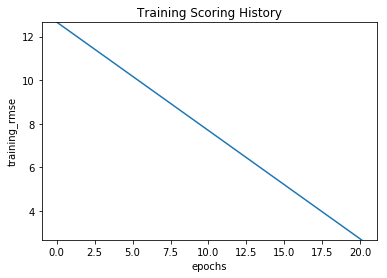

In [88]:
best_dl_model.plot(metric="rmse")